In [1]:
import pandas as pd
import numpy as np

from plotly import __version__

print(__version__)

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

5.9.0


C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer= load_breast_cancer()

In [7]:
df= pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



### 1. **`StandardScaler`**:
The `StandardScaler` standardizes features by removing the **mean** and scaling to **unit variance**. Each feature in the data will have:
   - **Mean = 0**
   - **Standard deviation = 1**

This is commonly used to normalize data for machine learning algorithms that are sensitive to feature scaling, such as SVM, logistic regression, and k-means clustering.

---

#### (a) **`scaler = StandardScaler()`**
- This initializes the `StandardScaler` object.

#### (b) **`scaler.fit(df)`**
- This computes the **mean** and **standard deviation** for each column in `df`.
- These statistics are saved internally in the `scaler` object and are later used for transformation.

#### (c) **`scaled_data = scaler.transform(df)`**
- This standardizes the data using the formula for each value in the DataFrame:

z = x - mean/ std


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler= StandardScaler()

In [18]:
scaler.fit(df)

StandardScaler()

In [19]:
scaled_data= scaler.transform(df)
scaled_data[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca= PCA(n_components=2)

In [22]:
pca.fit(scaled_data)

PCA(n_components=2)

In [23]:
pca_data= pca.transform(scaled_data)
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

<Axes: >

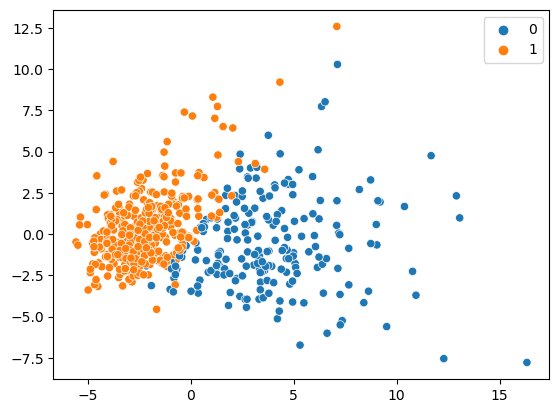

In [25]:
sns.scatterplot(x= pca_data[: ,0], y=pca_data[:,1], hue=cancer["target"])

In [26]:
df_comp= pd.DataFrame(pca.components_, columns=cancer["feature_names"])

<Axes: >

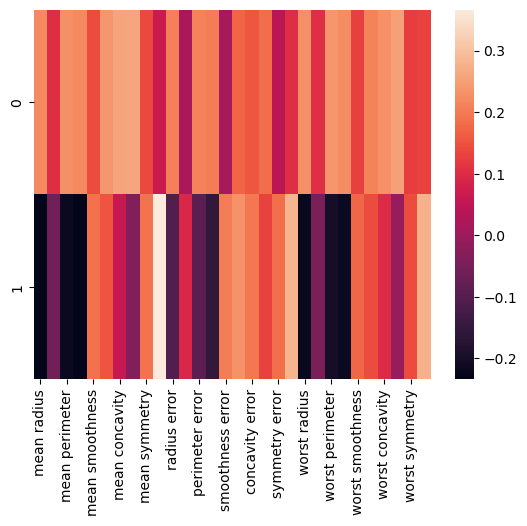

In [27]:
sns.heatmap(df_comp)